# Forecasting GDP Per Capita in US

---

### Project Overview
This project aims to forecast GDP per capita in the US over the next year. Accurately predicting GDP per capita is crucial for strategic product planning. Understanding whether a product is classified as a normal or inferior good allows firms to anticipate how changes in GDP per capita levels will impact consumer behavior and, consequently, their sales. By forecasting GDP per capita, businesses can better align their strategies to capitalize on expected shifts in purchasing power.

### Background
The dataset utilized in this project comprises US macroeconomic data spanning from 2002 to 2022. This comprehensive dataset includes key economic indicators such as GDP, inflation rates, and unemployment rates, which are essential for understanding the factors that influence GDP per capita. By analyzing these variables, the project aims to uncover trends and correlations that can inform accurate forecasts of future GDP per capita levels.

### Objectives
- **Segment Economic Cycles:** Identify and categorize distinct periods within the economic cycle to understand their impact on GDP per capita trends.
- **Analyze Influential Factors:** Determine the key macroeconomic factors that significantly influence GDP per capita.
- **Forecast Future Income:** Predict the GDP per capita for the upcoming year using the identified factors and economic indicators.

### Data Description
#### Dataset Overview
The dataset for this project is sourced from FRED, CENSUS, OECD, and the Conference Board. It covers a period of 241 months, from 2002 to 2022, and includes 15 features.
#### Key Features
- **DATE:** Start date of the month
- **UNRATE (%):** Unemployment rate in the US for the specified month
- **CONSUMER CONF INDEX:** Consumer Confidence Index provided by the Conference Board
- **PPI-CONST MAT.:** Producer Price Index for Construction Materials
- **CPIALLITEMS:** Consumer Price Index for All Items in the US
- **INFLATION (%):** Inflation rate in the US
- **MORTGAGE INT. MONTHLY AVG (%):** Average mortgage interest rate for the month
- **MED HOUSEHOLD INCOME:** Median household income in the US
- **CORP. BOND YIELD (%):** Corporate bond yield
- **MONTHLY HOME SUPPLY:** Monthly housing supply data
- **% SHARE OF WORKING POPULATION:** Percentage of the population aged 18 to 60
- **GDP PER CAPITA:** GDP per capita
- **QUARTERLY REAL GDP:** Real GDP data on a quarterly basis
- **QUARTERLY GDP GROWTH RATE (%):** Quarterly GDP growth rate
- **CSUSHPISA:** S&P/Case-Shiller U.S. National Home Price Index provided by FRED
#### Data Types
- **Categorical:** DATE
- **Numerical:** UNRATE (%), CONSUMER CONF INDEX, PPI-CONST MAT., CPIALLITEMS, INFLATION (%), MORTGAGE INT. MONTHLY AVG (%), MED HOUSEHOLD INCOME, CORP. BOND YIELD (%), MONTHLY HOME SUPPLY, % SHARE OF WORKING POPULATION, GDP PER CAPITA, QUARTERLY REAL GDP, QUARTERLY GDP GROWTH RATE (%), CSUSHPISA

### Prediction
The primary goal of this project is to forecast GDP per capita for the upcoming year. By leveraging historical data and macroeconomic indicators, the aim is to develop an accurate prediction model that can provide valuable insights for economic planning and analysis.

### Metric
**RMSE (Root Mean Squared Error):** RMSE measures the square root of the average of the squared differences between predicted and actual values. It provides an easily interpretable measure of prediction accuracy, expressed in the same units as the target variable. Lower RMSE values indicate better model performance and closer alignment between predicted and actual values.

### References
1. **Dataset Source:** [FRED](https://fred.stlouisfed.org/), [CENSUS](https://www.census.gov/data.html), [OECD](https://www.oecd.org/statistics/), [Conference Board](https://www.conference-board.org/)

---

## Exploratory Data Analysis

### Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,DATE,UNRATE(%),CONSUMER CONF INDEX,PPI-CONST MAT.,CPIALLITEMS,INFLATION(%),MORTGAGE INT. MONTHLY AVG(%),MED HOUSEHOLD INCOME,CORP. BOND YIELD(%),MONTHLY HOME SUPPLY,% SHARE OF WORKING POPULATION,GDP PER CAPITA,QUARTERLY REAL GDP,QUARTERLY GDP GROWTH RATE (%),CSUSHPISA
0,01-05-2022,3.6,106.4,352.857,123.322800,8.581511,5.2300,NaN,4.13,8.4,NaN,74737,19699.465,-0.144227,120.724
1,01-04-2022,3.6,107.3,343.730,121.978170,8.258629,4.9825,NaN,3.76,8.4,NaN,74737,19699.465,-0.144227,121.813
2,01-03-2022,3.6,107.2,345.852,121.301004,8.542456,4.1720,NaN,3.43,7.0,NaN,73289,19727.918,-0.395692,122.888
3,01-02-2022,3.8,110.5,343.583,119.702806,7.871064,3.7625,NaN,3.25,6.0,NaN,73289,19727.918,-0.395692,123.831
4,01-01-2022,4.0,113.8,345.742,118.619339,7.479872,3.4450,NaN,2.93,5.7,NaN,73289,19727.918,-0.395692,124.780


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           241 non-null    object 
 1   UNRATE(%)                      241 non-null    float64
 2   CONSUMER CONF INDEX            241 non-null    float64
 3   PPI-CONST MAT.                 241 non-null    float64
 4   CPIALLITEMS                    241 non-null    float64
 5   INFLATION(%)                   241 non-null    float64
 6   MORTGAGE INT. MONTHLY AVG(%)   241 non-null    float64
 7   MED HOUSEHOLD INCOME           224 non-null    float64
 8   CORP. BOND YIELD(%)            241 non-null    float64
 9   MONTHLY HOME SUPPLY            241 non-null    float64
 10  % SHARE OF WORKING POPULATION  236 non-null    float64
 11  GDP PER CAPITA                 241 non-null    int64  
 12  QUARTERLY REAL GDP             241 non-null    flo

In [5]:
data.describe()

,UNRATE(%),CONSUMER CONF INDEX,PPI-CONST MAT.,CPIALLITEMS,INFLATION(%),MORTGAGE INT. MONTHLY AVG(%),MED HOUSEHOLD INCOME,CORP. BOND YIELD(%),MONTHLY HOME SUPPLY,% SHARE OF WORKING POPULATION,GDP PER CAPITA,QUARTERLY REAL GDP,QUARTERLY GDP GROWTH RATE (%),CSUSHPISA
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,224.000000,241.000000,241.000000,236.000000,241.000000,241.000000,241.000000,241.000000
mean,6.074689,90.809544,206.949863,95.539665,2.296497,4.697956,53273.982143,4.471162,5.974274,66.410104,52896.082988,16536.012095,0.490060,175.306996
std,1.987058,25.871004,40.479900,11.087025,1.641645,1.119850,7475.321506,1.079004,1.895763,0.802918,8840.592318,1708.435162,1.453910,36.780758
min,3.500000,25.000000,143.800000,75.859538,-2.097161,2.684000,42409.000000,2.140000,3.300000,64.924129,37860.000000,13477.356000,-8.937251,120.724000
25%,4.700000,70.400000,183.300000,87.722400,1.463784,3.802500,49007.250000,3.690000,4.600000,65.623251,46977.000000,15304.517000,0.293599,147.395000
50%,5.600000,94.500000,206.200000,96.819215,2.070508,4.457500,50303.000000,4.340000,5.500000,66.739214,51554.000000,16253.726000,0.580001,169.812000
75%,7.300000,108.200000,221.700000,103.255463,2.969762,5.812500,59039.000000,5.410000,6.700000,67.128435,58745.000000,17896.623000,0.833911,189.707000
max,14.700000,138.400000,352.857000,123.322800,8.581511,6.806000,68703.000000,6.750000,12.200000,67.298433,74737.000000,19806.290000,7.547535,304.831000


### Data Visualization

In [6]:
# Kmeans Imputer

from sklearn.impute import KNNImputer

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

imputer = KNNImputer(n_neighbors=5)

data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [7]:
data['GDP PER CAPITA +1 year'] = data['GDP PER CAPITA'].shift(-12)

In [8]:
# remove the last 12 rows
data = data[:-12]

In [9]:
# reverse the order
data = data.iloc[::-1]

/home/hpark/Syncthing/Professional/DS_Projects/US_Macroeconomic_Factors/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



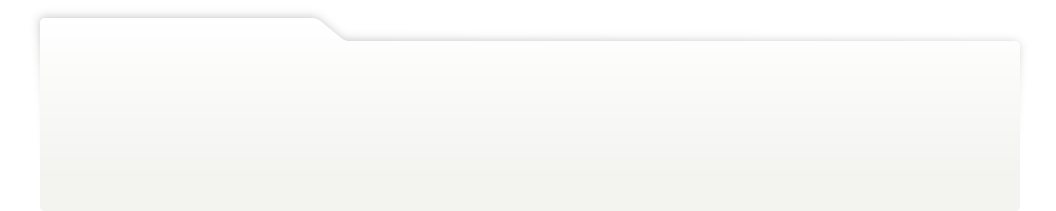
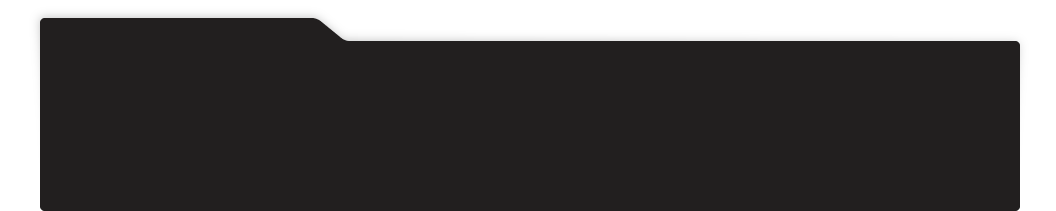
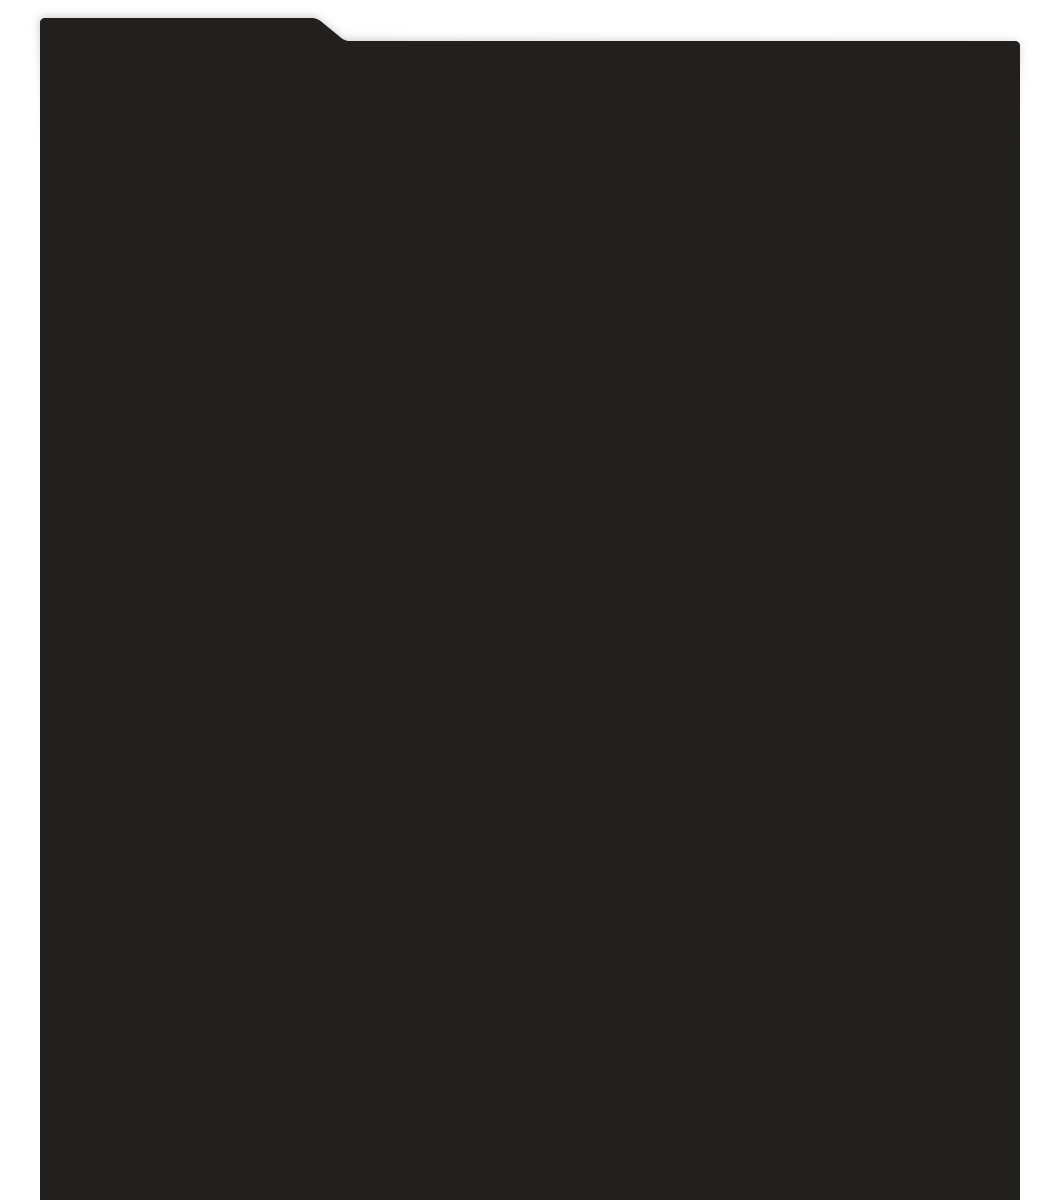
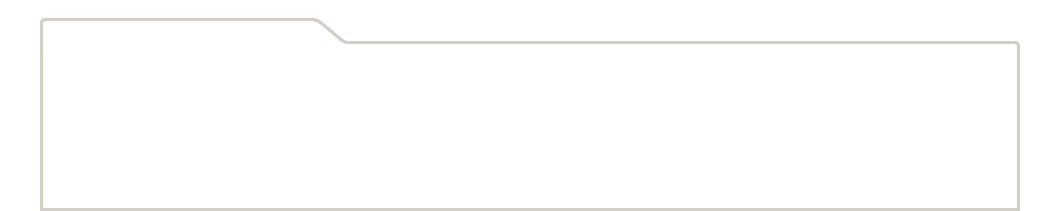
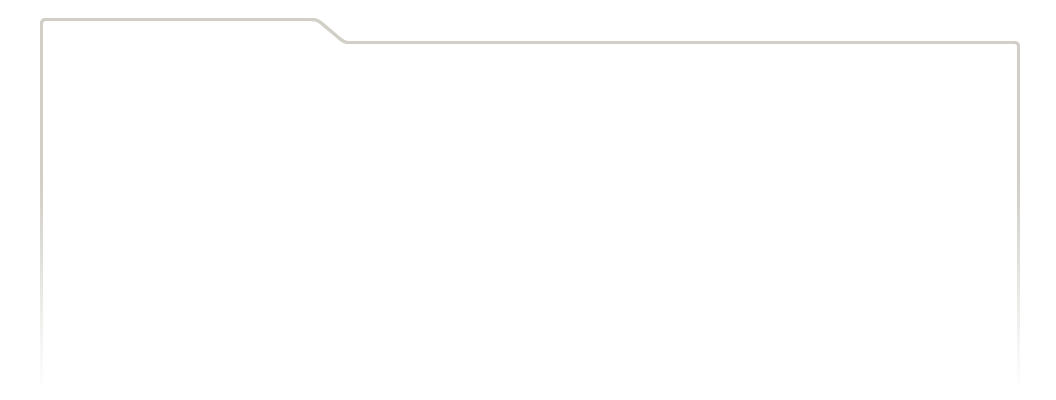
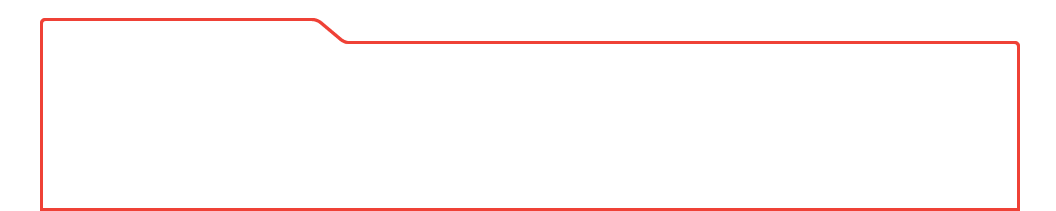
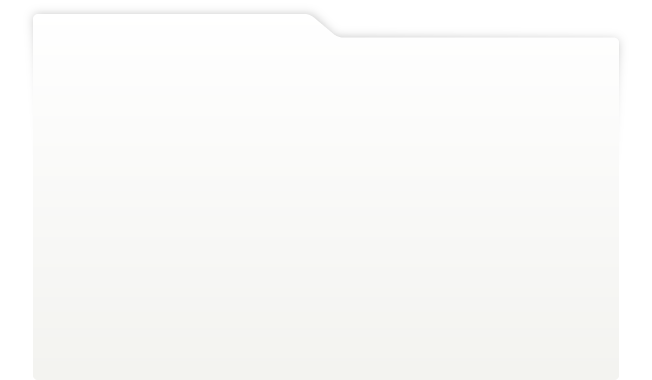
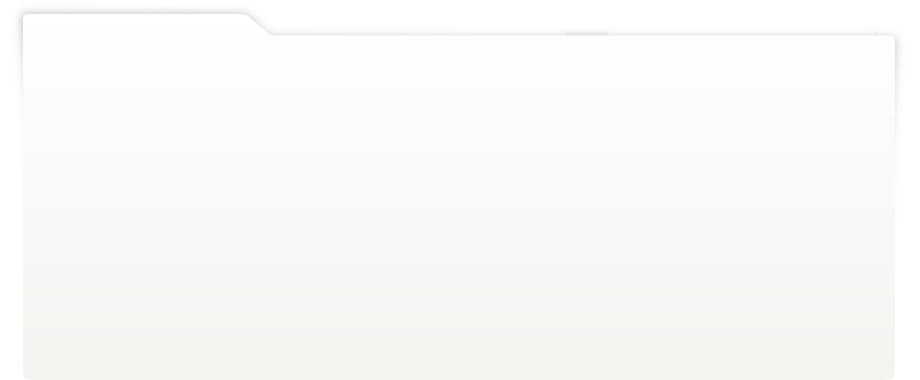
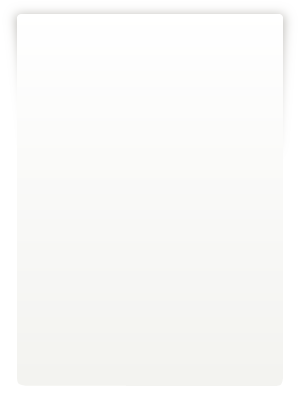
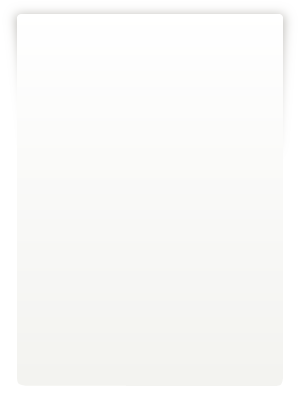
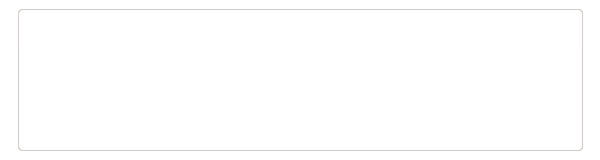
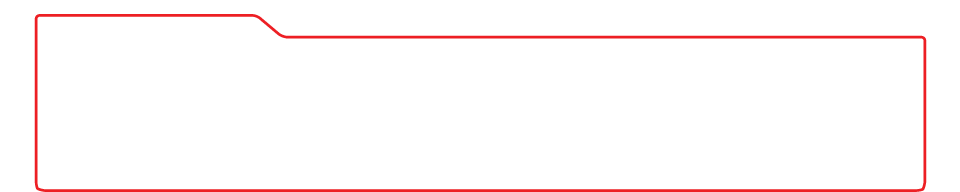
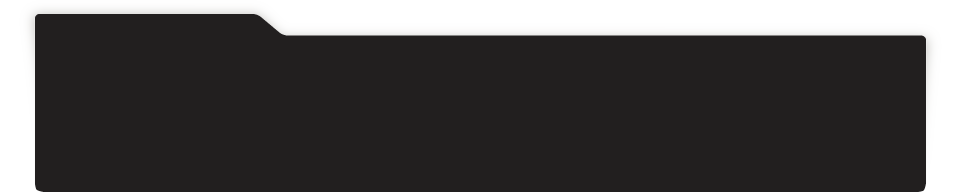
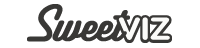
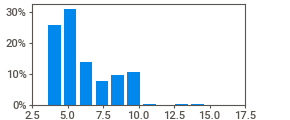
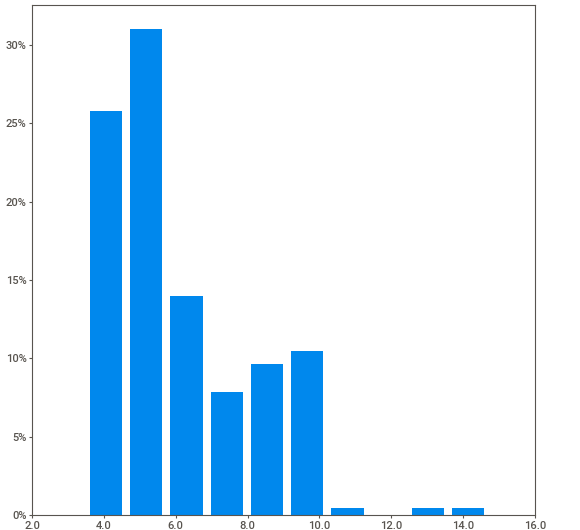
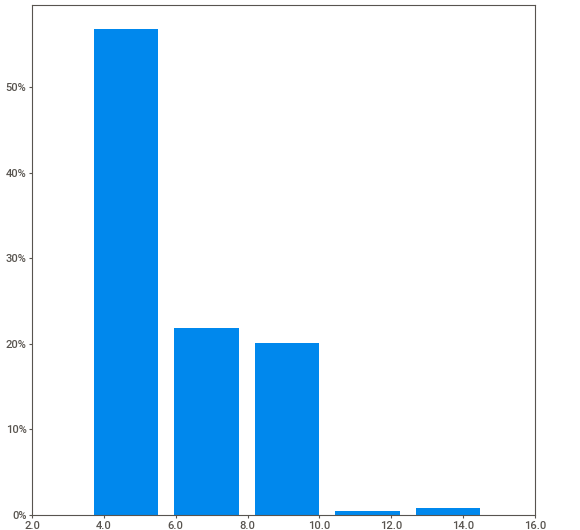
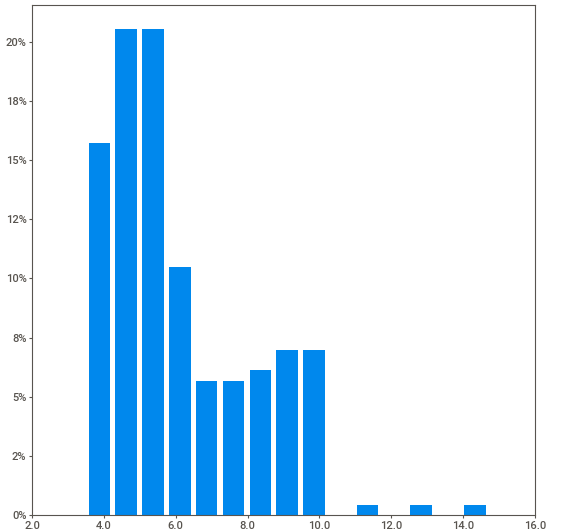
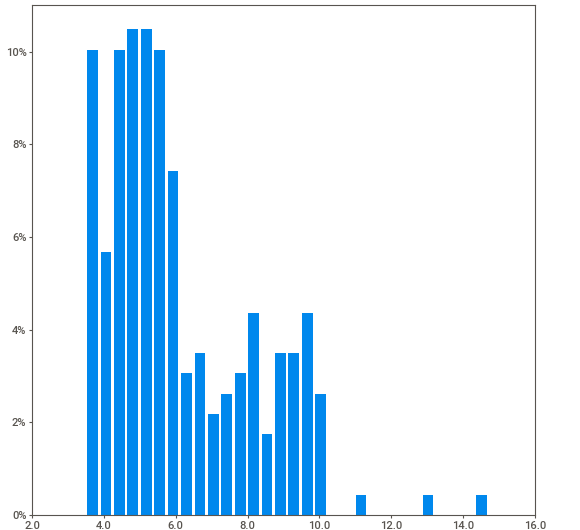
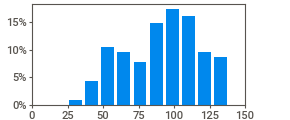
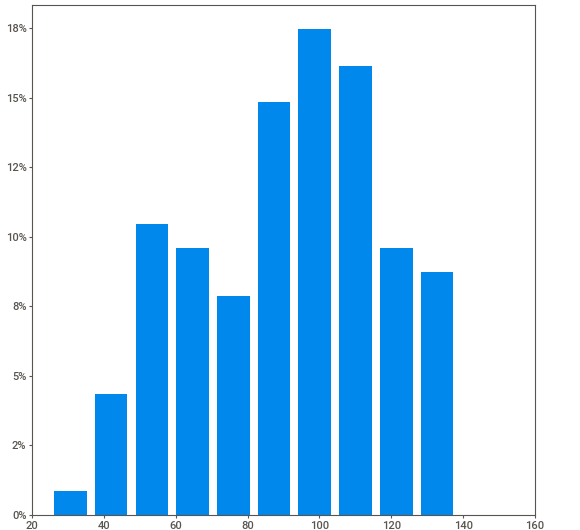
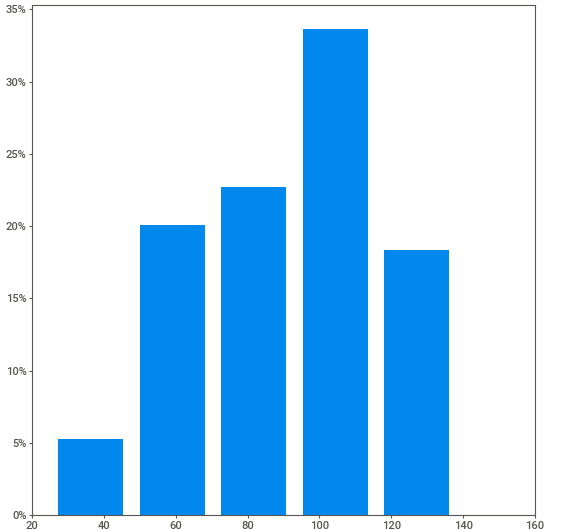
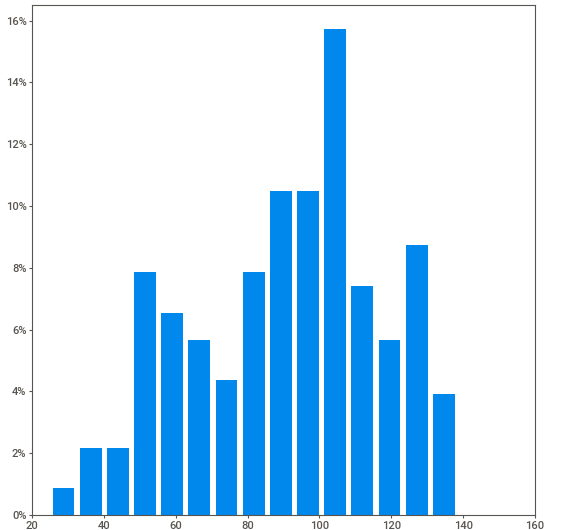
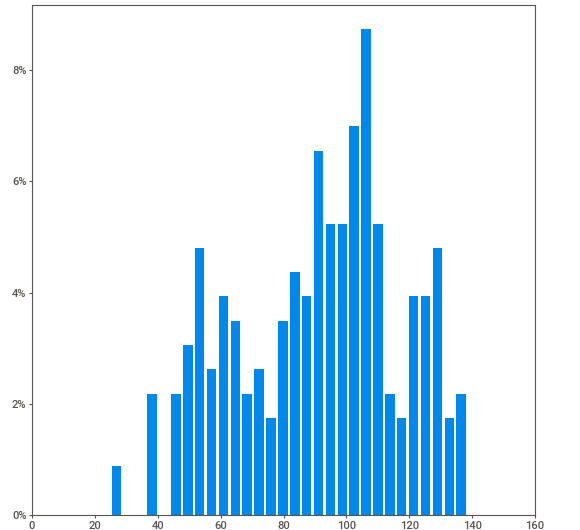
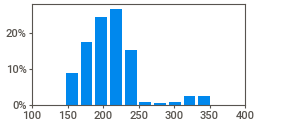
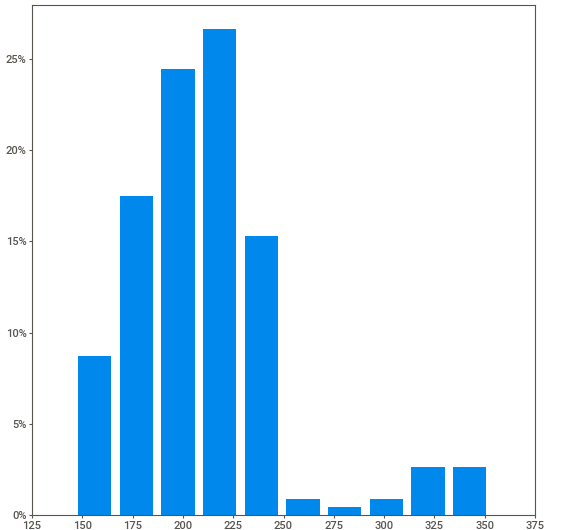
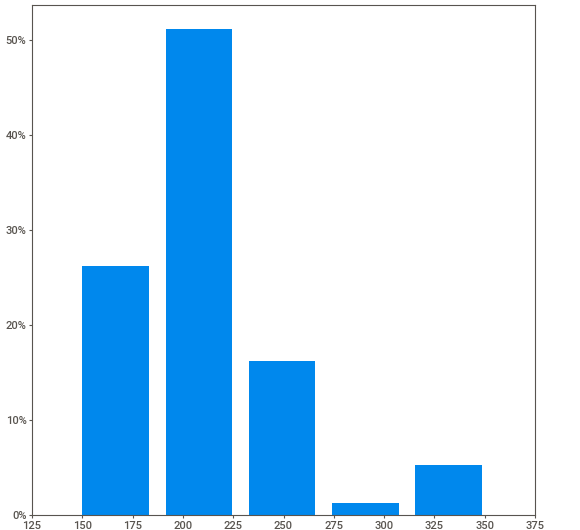
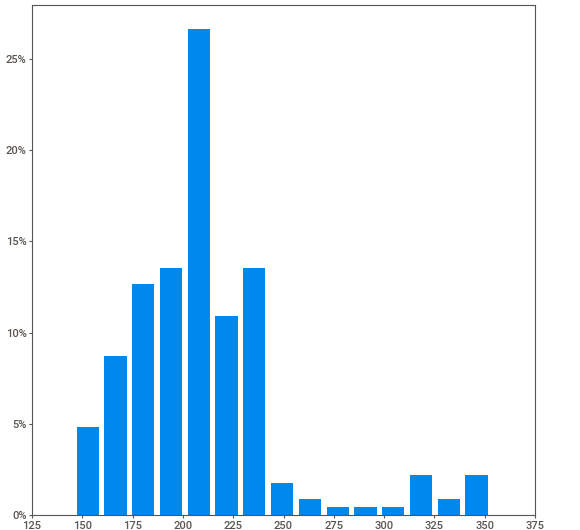
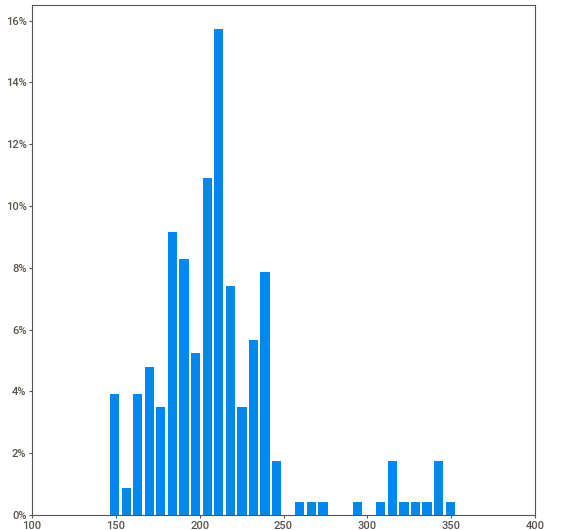
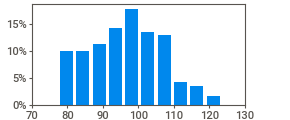
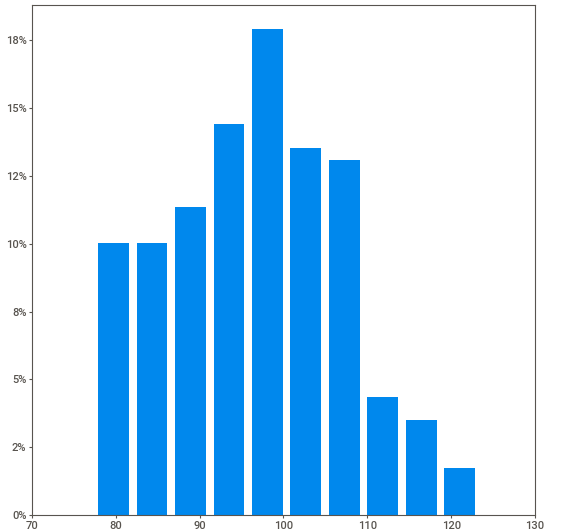
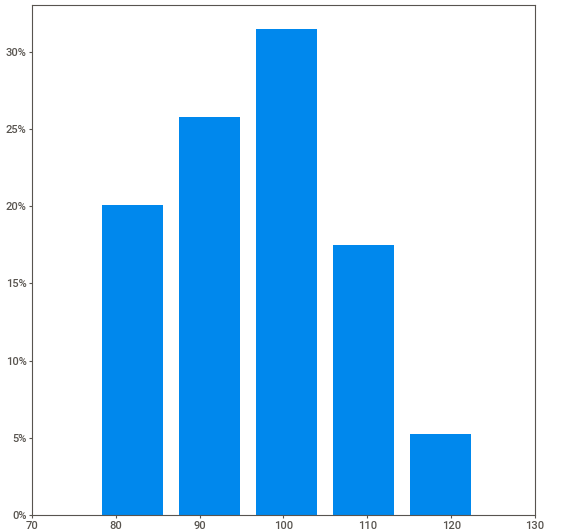
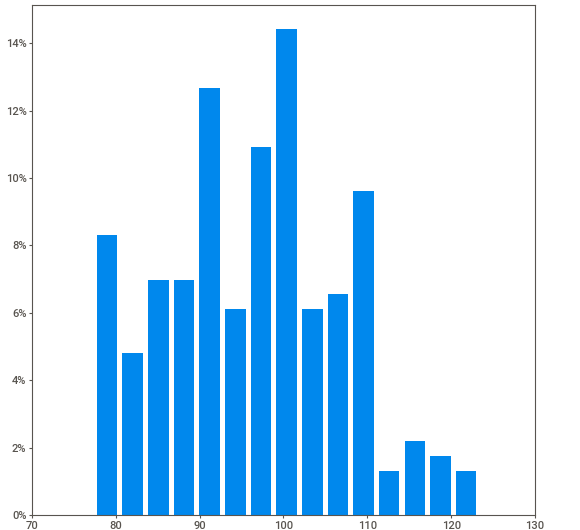
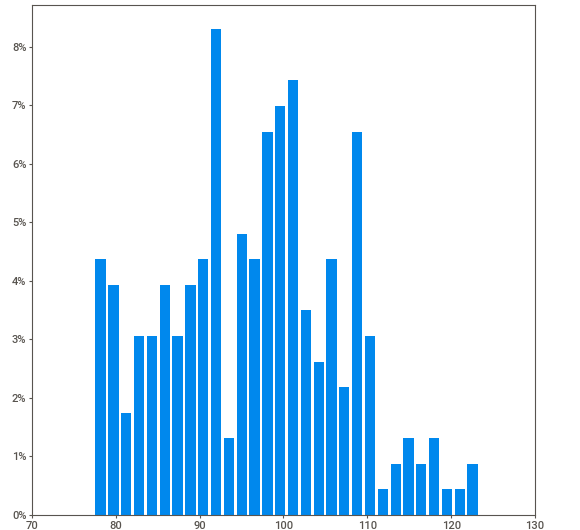
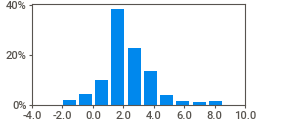
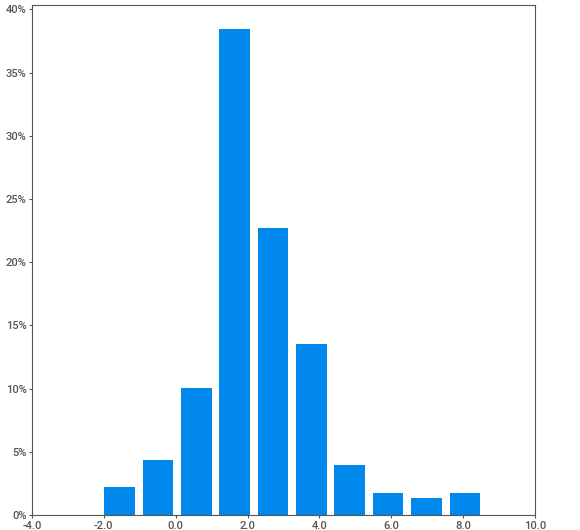
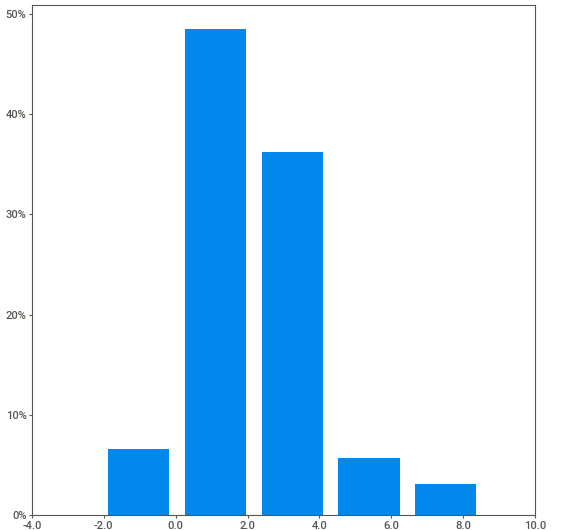
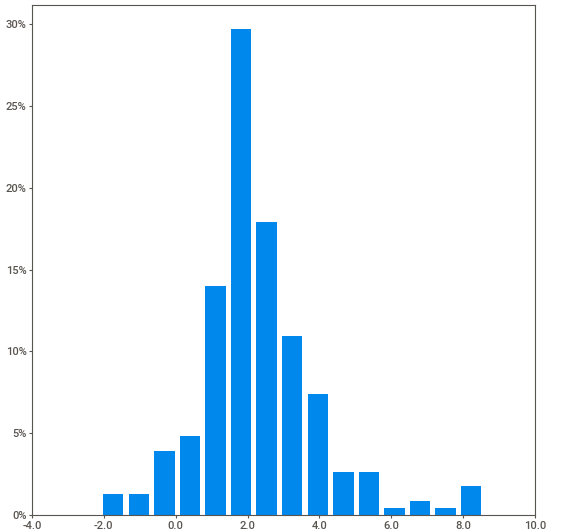
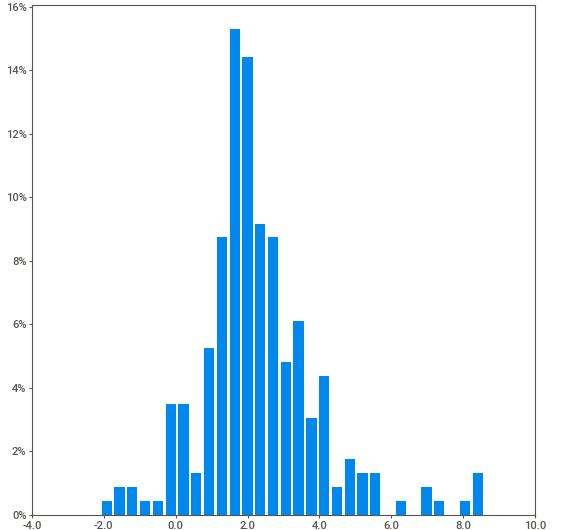
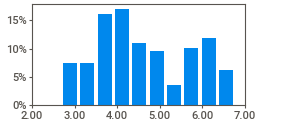
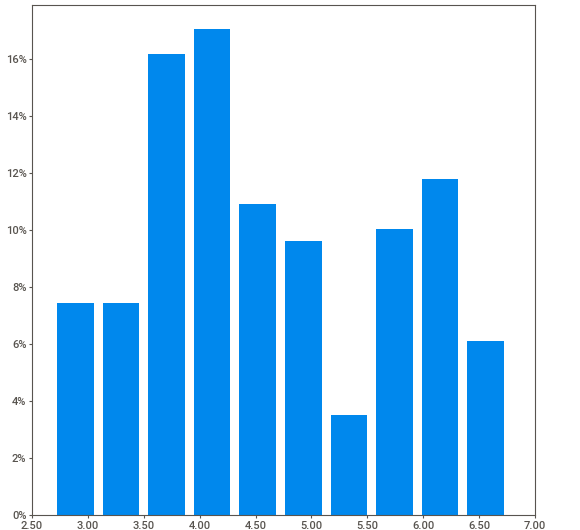
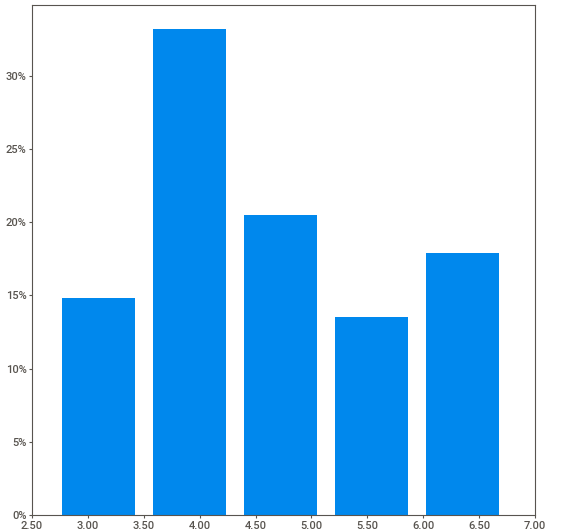
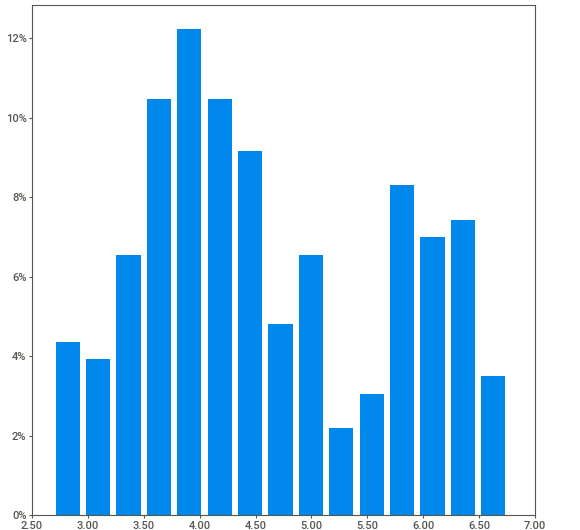
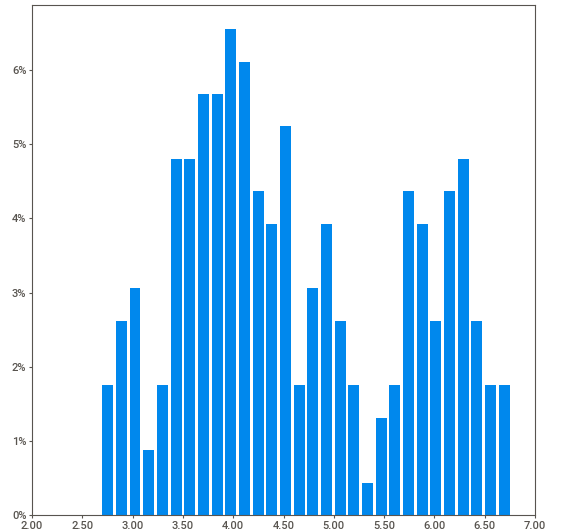
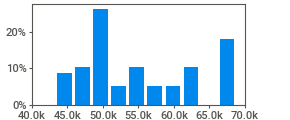
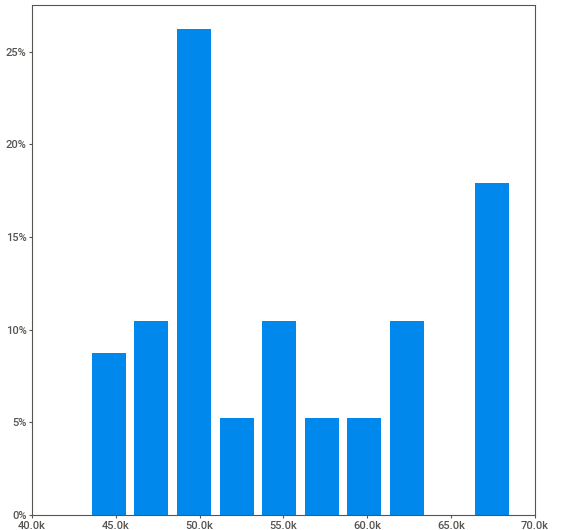
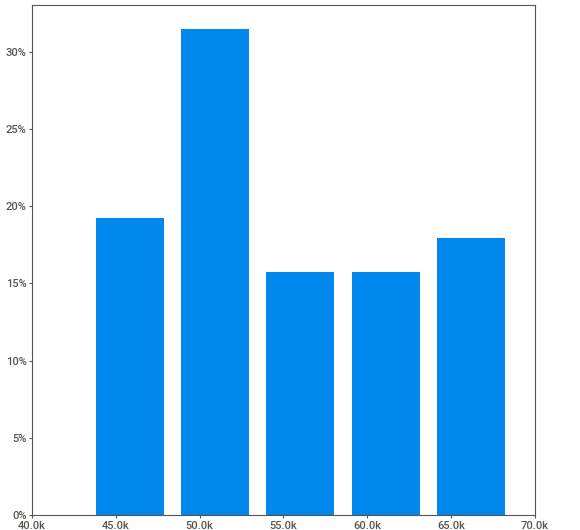
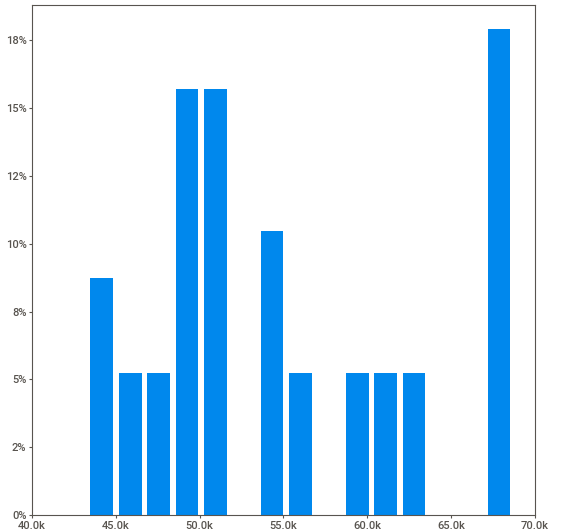
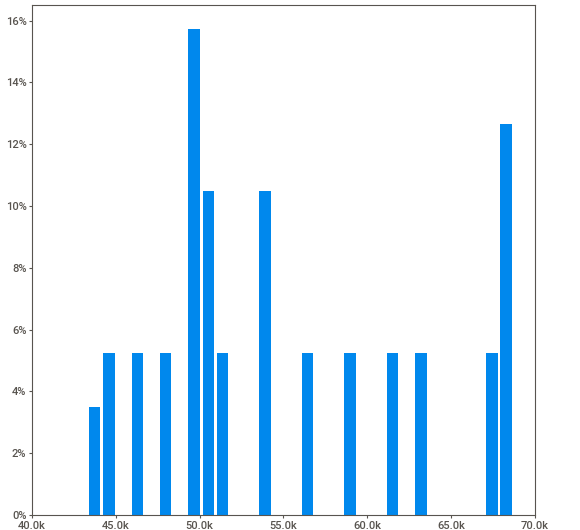
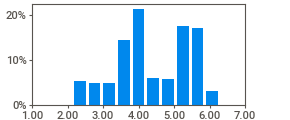
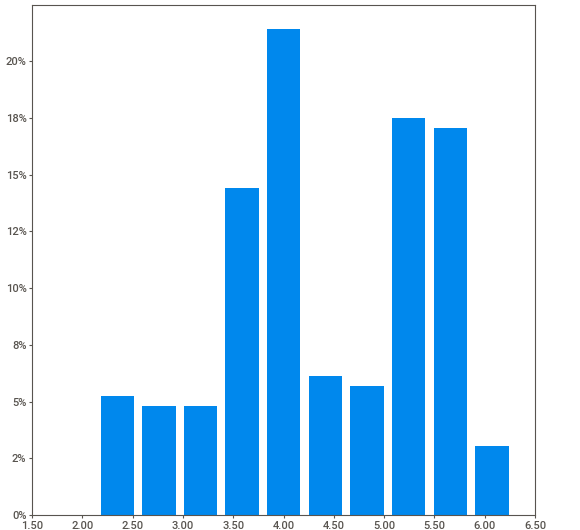
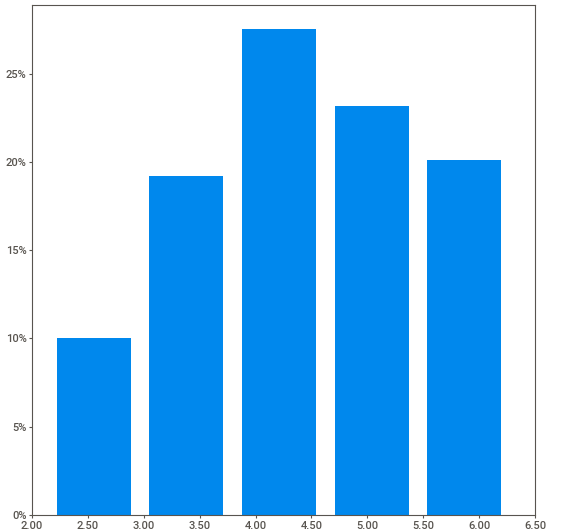
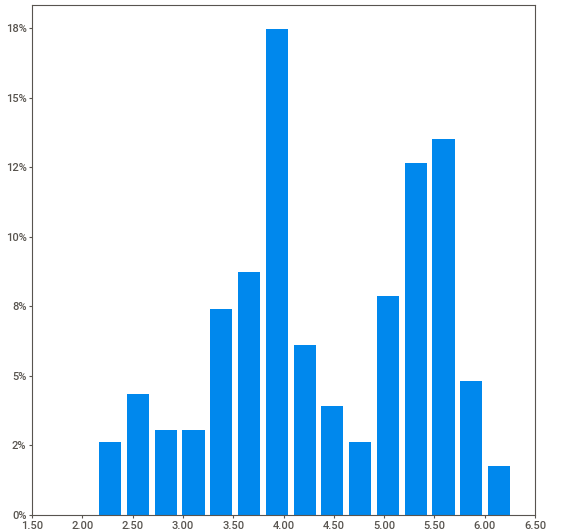
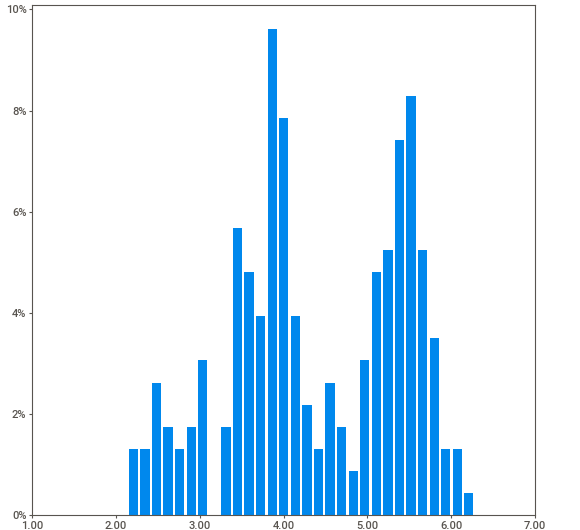
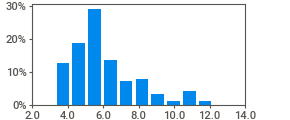
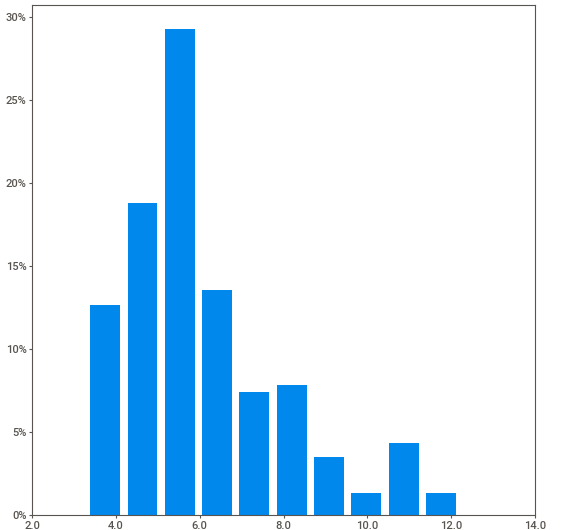
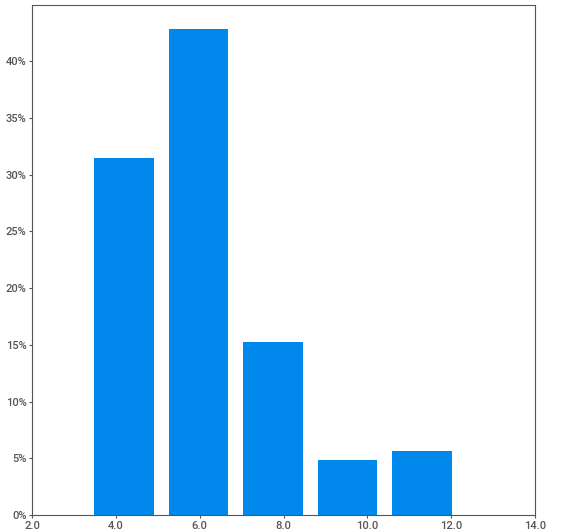
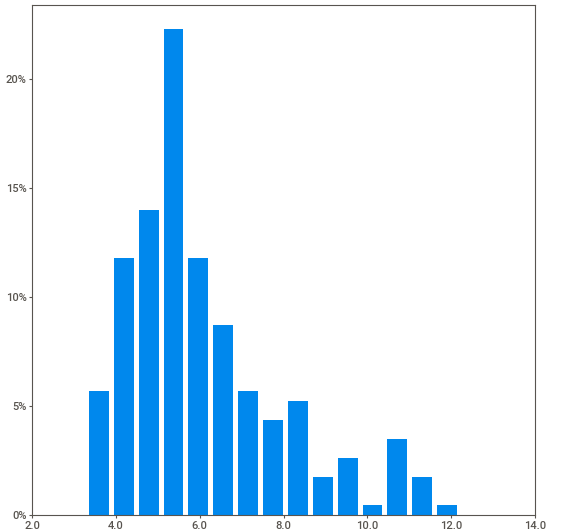
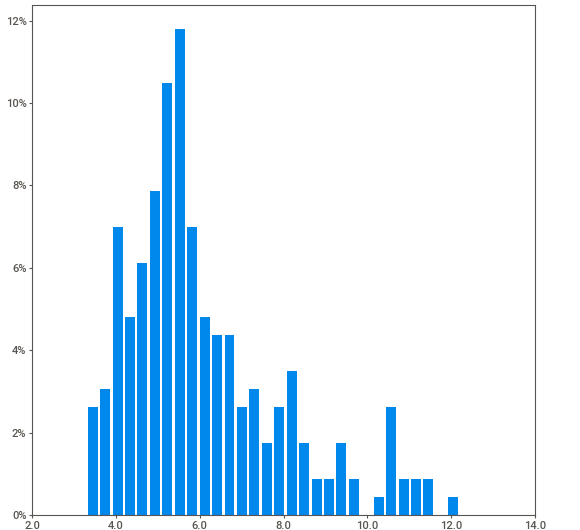
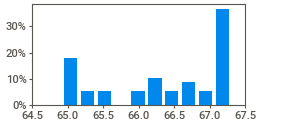
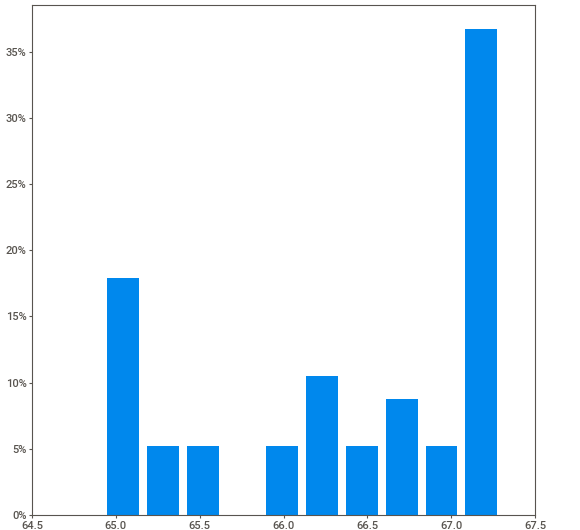
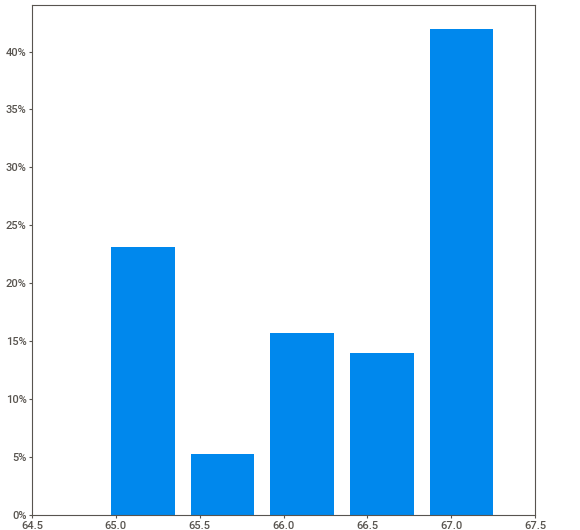
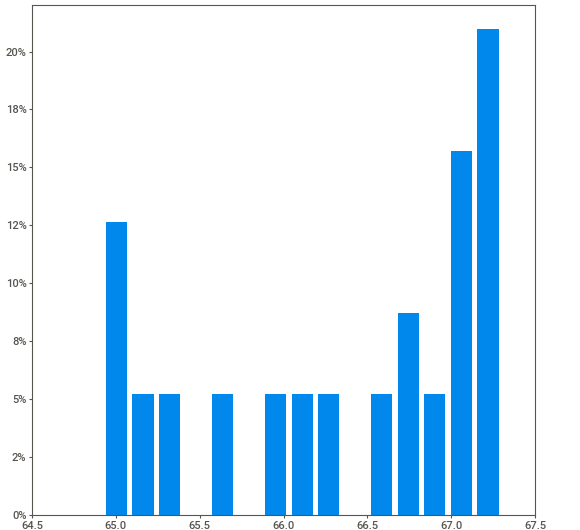
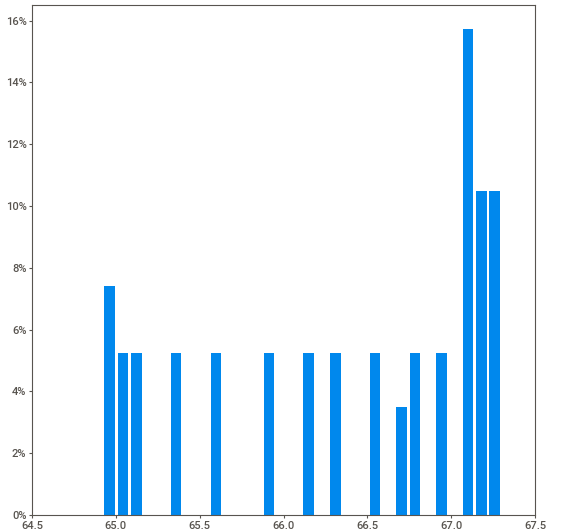
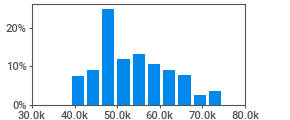
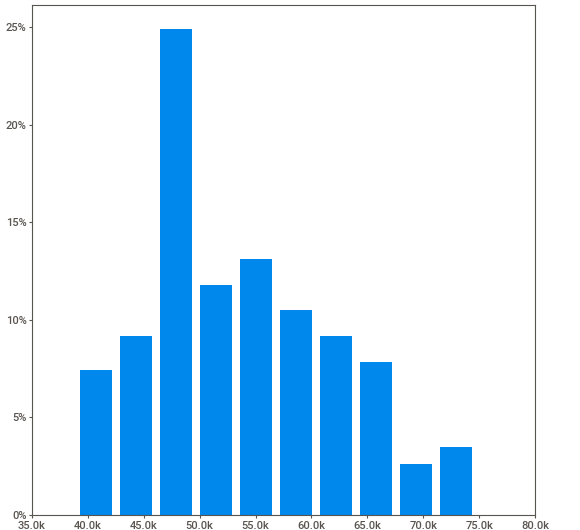
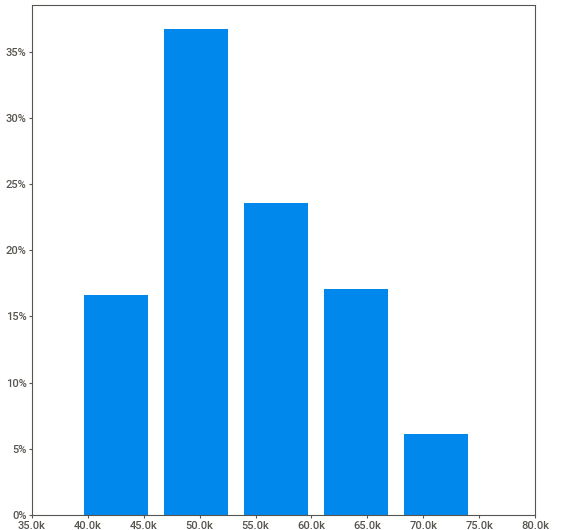
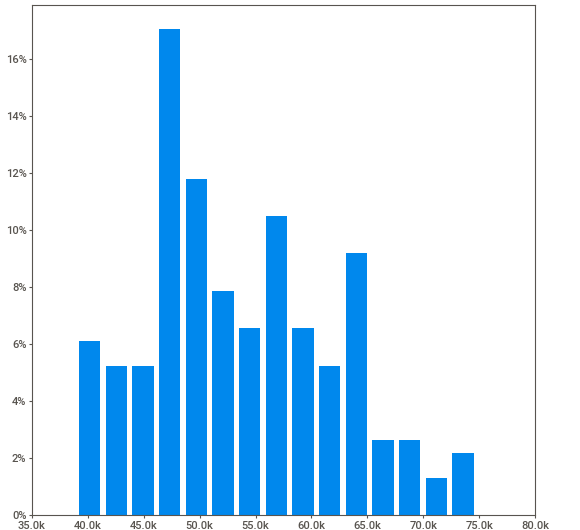
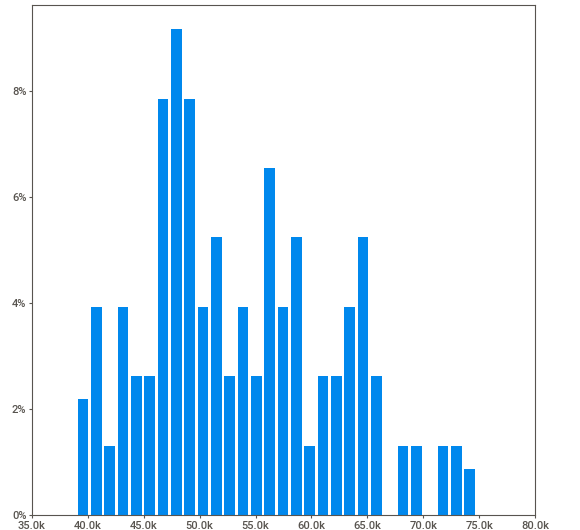
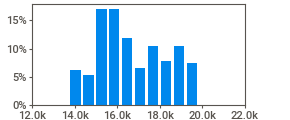
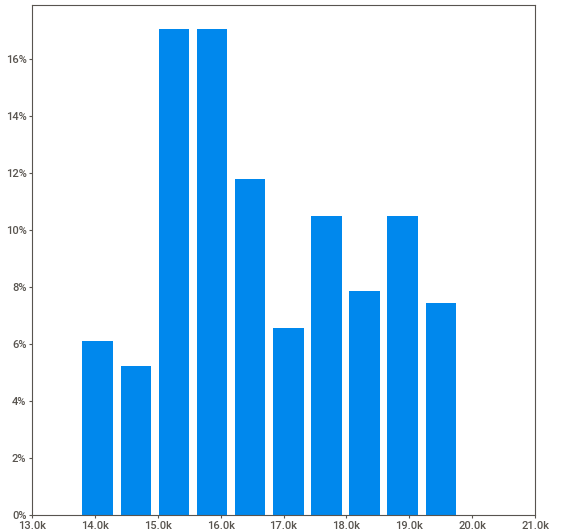
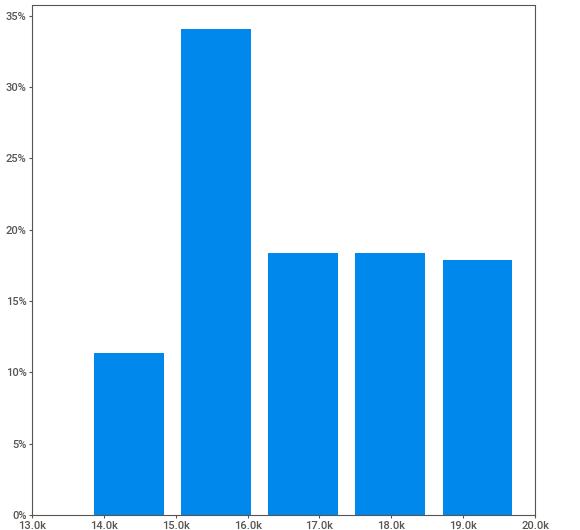
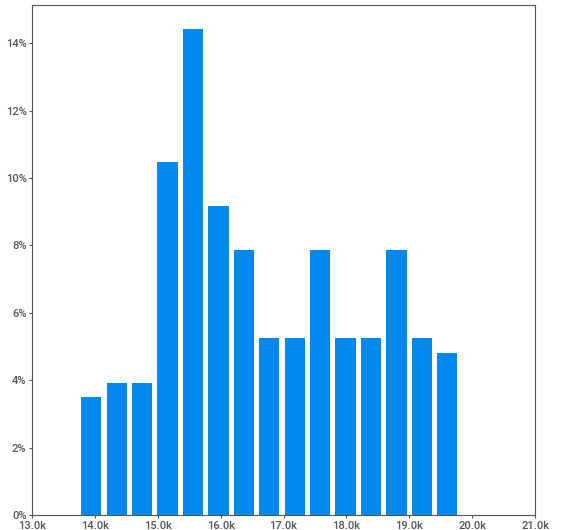
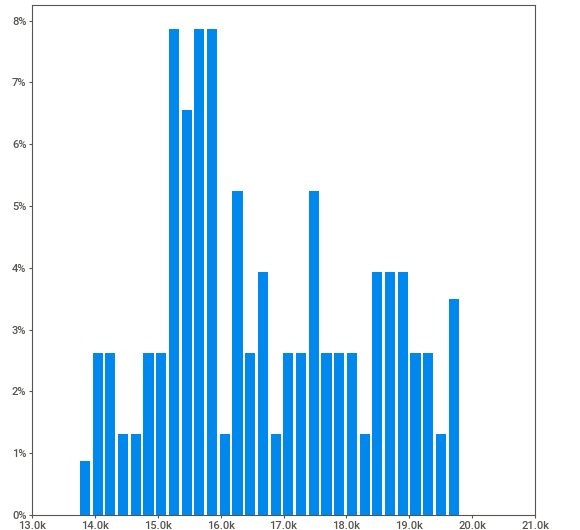
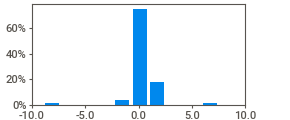
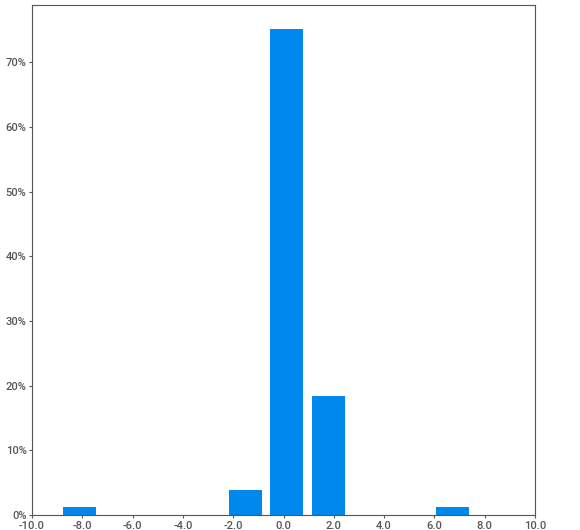
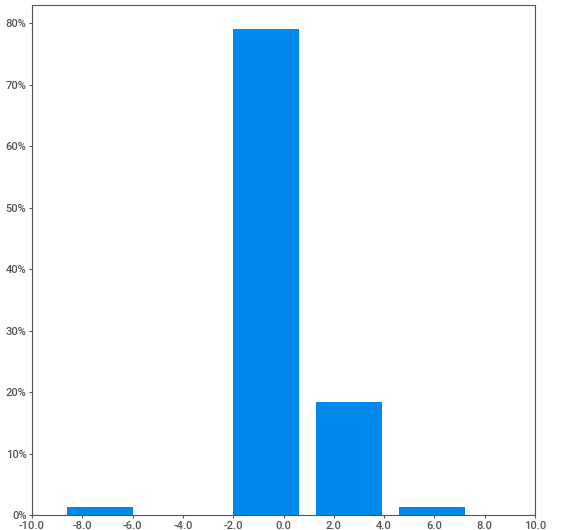
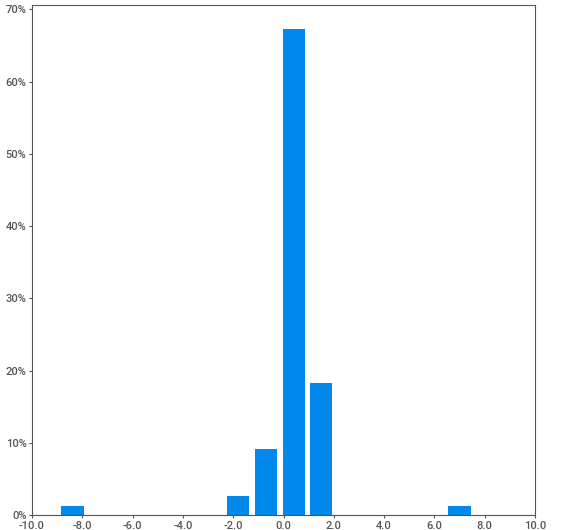
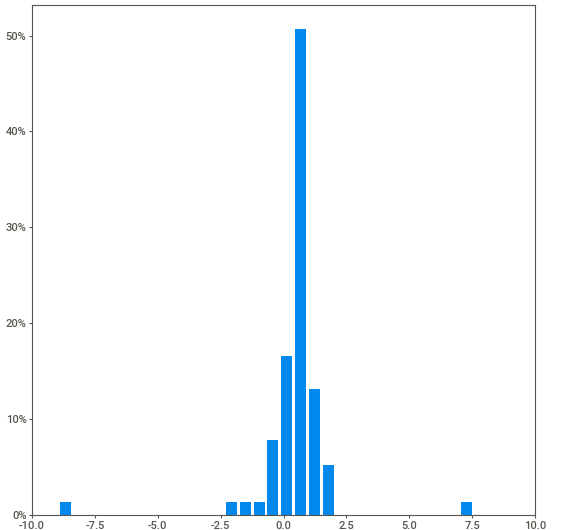
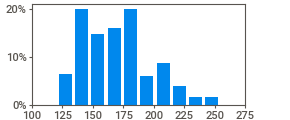
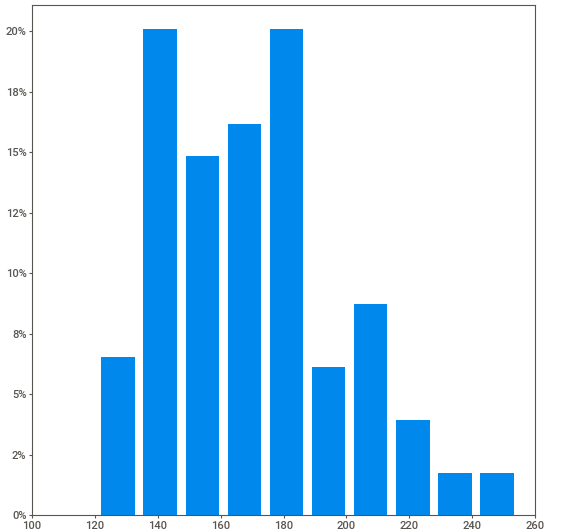
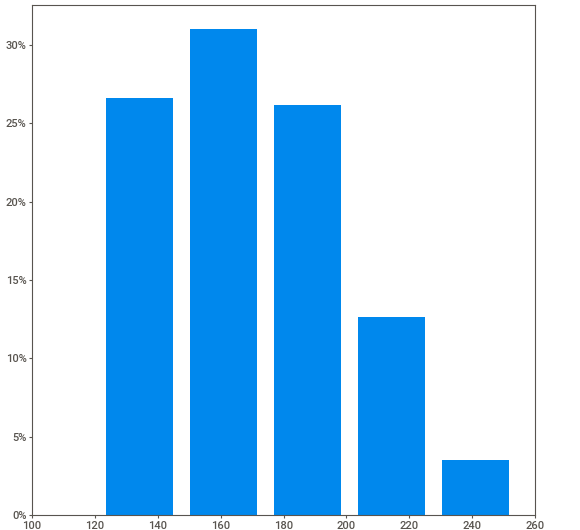
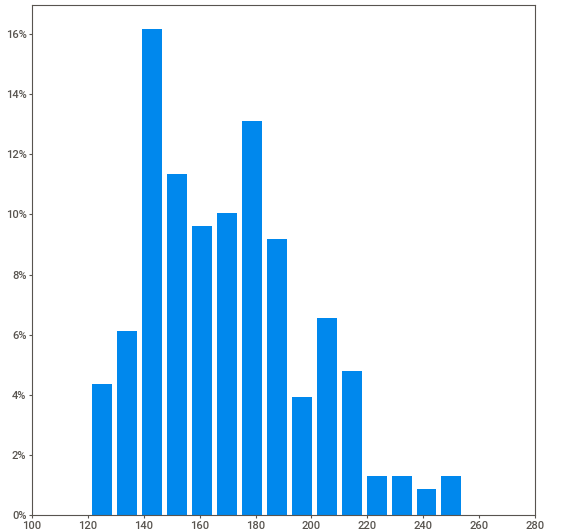
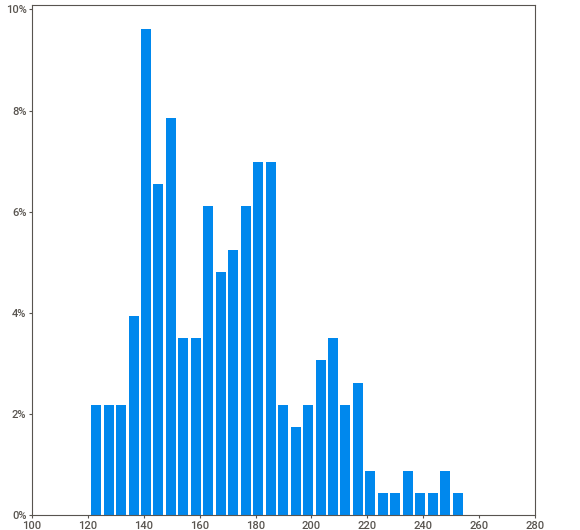
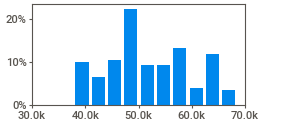
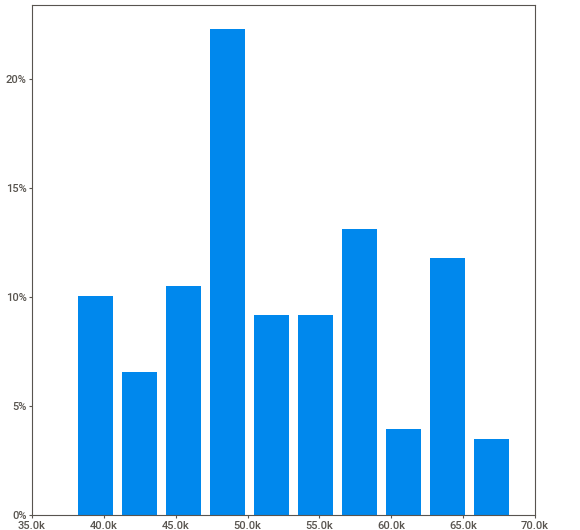
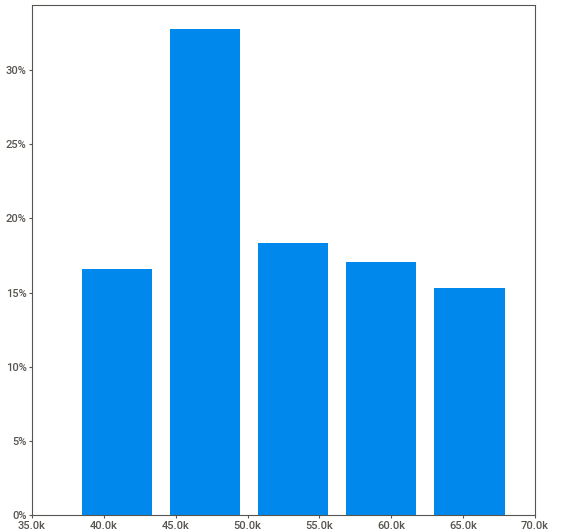
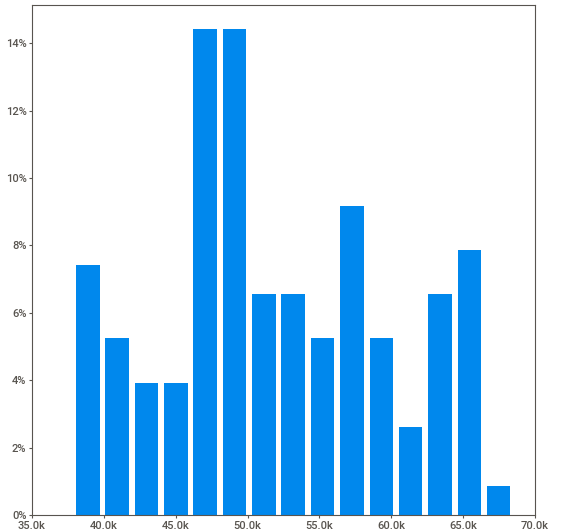
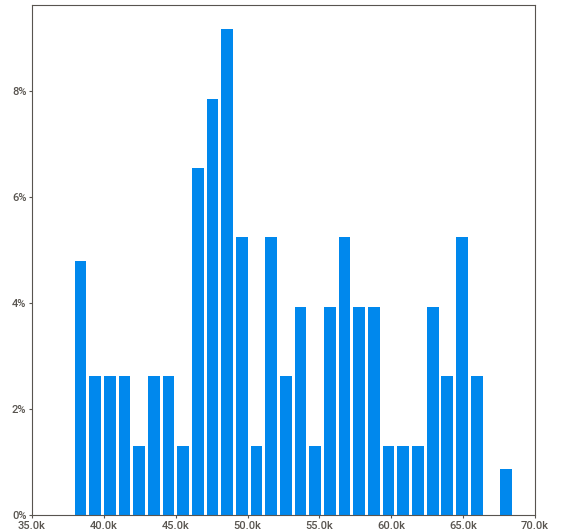
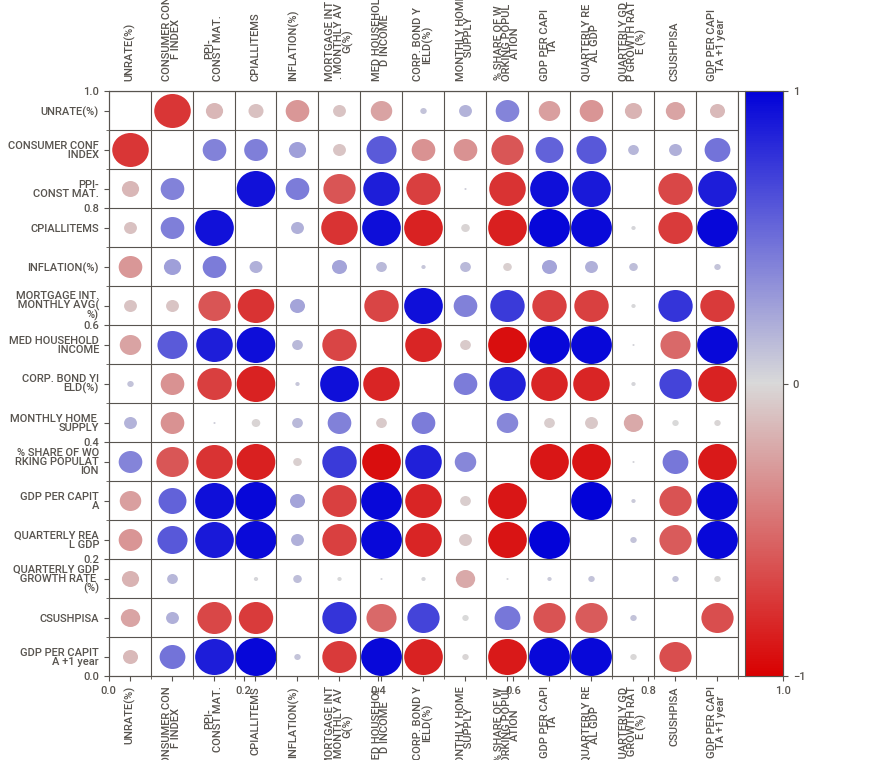
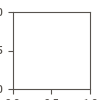

In [10]:
import sweetviz as sv

report = sv.analyze(data)
report.show_notebook()

In [11]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

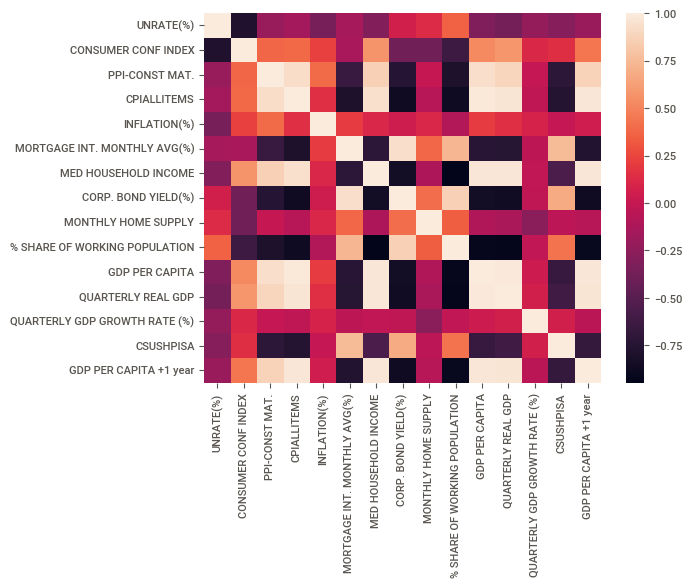

In [12]:
# correlation matrix
corr = data[numerical_columns].corr()
sns.heatmap(corr)
plt.show()

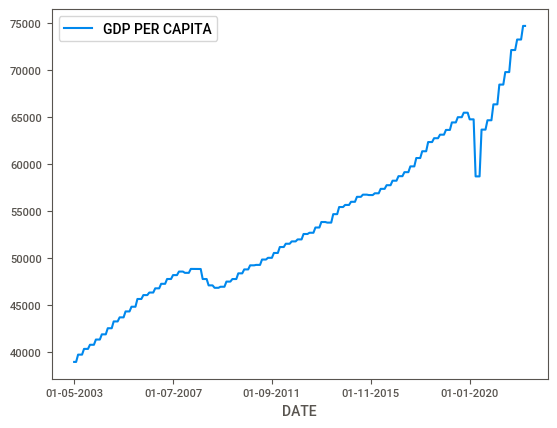

In [13]:
# time series plot

data.plot(x='DATE', y='GDP PER CAPITA')
plt.show()

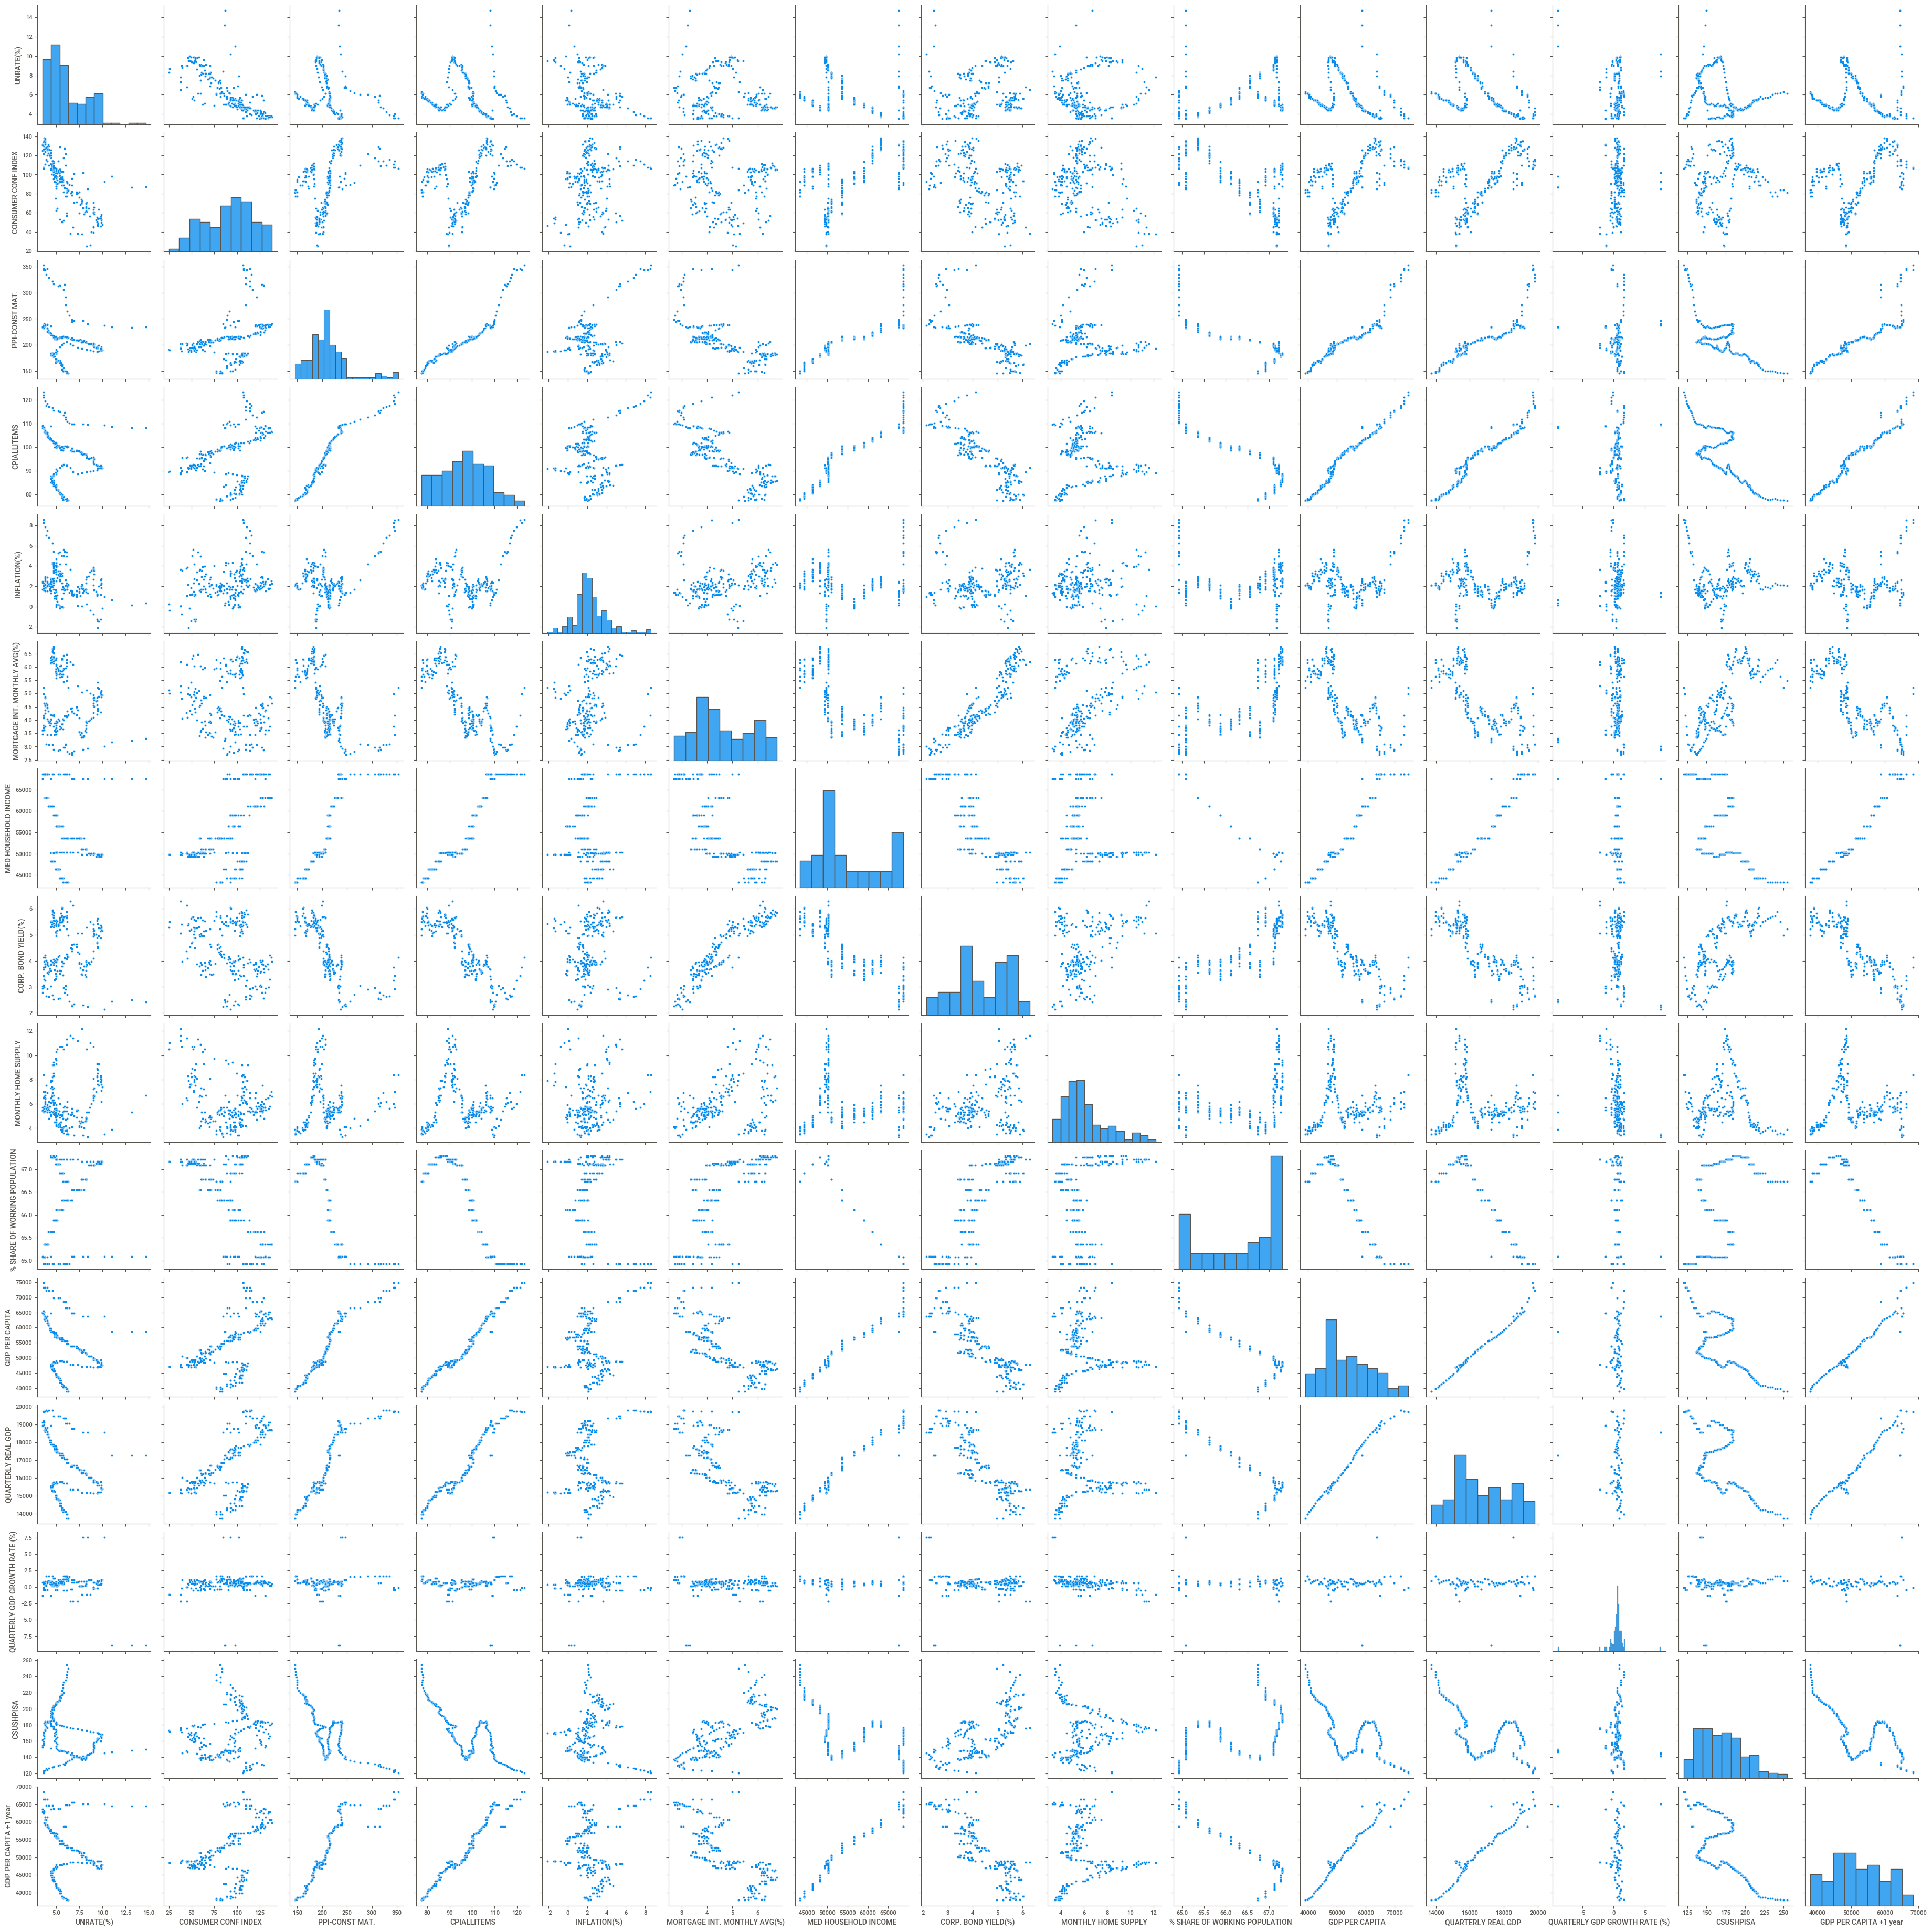

In [14]:
# pair plots

sns.pairplot(data)
plt.show()